## EFC-Package

In [10]:
from math import ceil
from pprint import pprint

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import auc, classification_report, confusion_matrix, f1_score, roc_curve

In [12]:
from efc import EnergyBasedFlowClassifier

In [13]:
from research_aml_elliptic.src.reaml.model_performance import calculate_model_score
from research_aml_elliptic.src.experiments.general_functions.elliptic_data_preprocessing import run_elliptic_preprocessing_pipeline

In [14]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold

In [15]:
from matplotlib import pyplot as plt

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [18]:
import seaborn as sns

In [19]:
# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = True

In [34]:
results_efc = 'results/efc'

### Unsupervised Elliptic Data Set With EFC

In [20]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train, X_test, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [ ]:
# X_test.drop(['time_step'], axis=1)

In [ ]:
# X_train.drop(['time_step'], axis=1)

In [21]:
len(y_train) + len(y_test)

46564

In [22]:
len(np.where(y_train == 1)[0]) + len(np.where(y_test == 1)[0])

4545

In [23]:
len(np.where(y_train == 0)[0]) + len(np.where(y_test == 0)[0])

42019

In [24]:
len(np.where(y_train == 2)[0]) + len(np.where(y_test == 2)[0])

0

In [25]:
clf = EnergyBasedFlowClassifier(n_bins=30, cutoff_quantile=0.9)

In [26]:
clf.fit(X_train, y_train, base_class=0)

EnergyBasedFlowClassifier(cutoff_quantile=0.9)

In [28]:
y_pred, y_energies = clf.predict(X_test, return_energies=True)

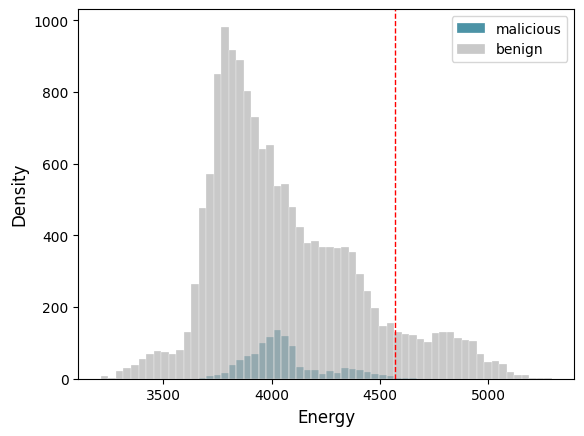

In [50]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.savefig(f'{results_efc}/1_unsupervised_efc.png')

In [52]:
columns_metrics = ["accuracy", "f1", "f1_micro", "f1_macro", "precision", "recall", "roc_auc"]

In [55]:
metric_dict = {
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred, pos_label=1),
    "f1_micro": f1_score(y_test, y_pred, average="micro"),
    "f1_macro": f1_score(y_test, y_pred, average="macro"),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred),
}

In [56]:
pprint(metric_dict)

{'accuracy': 0.8428914217156569,
 'f1': np.float64(0.0030452988199467074),
 'f1_macro': np.float64(0.4588859808982682),
 'f1_micro': np.float64(0.8428914217156569),
 'precision': np.float64(0.0025906735751295338),
 'recall': np.float64(0.003693444136657433),
 'roc_auc': np.float64(0.4524465809250683)}


In [57]:
df_efc_metrics = pd.DataFrame(data=metric_dict, columns=columns_metrics, index=[0])
df_efc_metrics.insert(0, 'Technique', 'Unbalanced Dataset')
df_efc_metrics

,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall,roc_auc
0,Unbalanced Dataset,0.842891,0.003045,0.842891,0.458886,0.002591,0.003693,0.452447


### Including Unlabeled Data

In [59]:
# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = False

In [60]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train, X_test, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [ ]:
# X_test.drop(['time_step'], axis=1)

In [ ]:
# X_train.drop(['time_step'], axis=1)

In [61]:
clf = EnergyBasedFlowClassifier(n_bins=30, cutoff_quantile=0.9)

In [62]:
clf.fit(X_train, y_train, base_class=0)

EnergyBasedFlowClassifier(cutoff_quantile=0.9)

In [63]:
y_pred, y_energies = clf.predict(X_test, return_energies=True)

In [64]:
y_test

136265    2
136266    2
136267    2
136268    2
136269    2
         ..
203764    2
203765    2
203766    1
203767    2
203768    2
Name: class, Length: 67504, dtype: int64

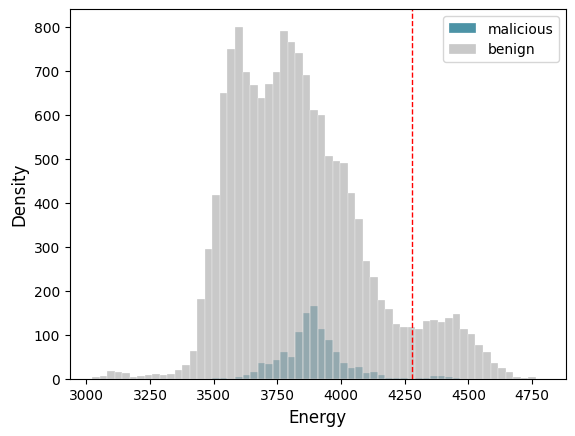

In [65]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.savefig(f'{results_efc}/2_unlabeled_data.png')

In [78]:
metric_dict_1 = {
    "Technique": "Unlabeled Dataset",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": None,
    "f1_micro": f1_score(y_test, y_pred, average="micro"),
    "f1_macro": f1_score(y_test, y_pred, average="macro"),
    "precision": None,
    "recall": None,
    "roc_auc": None,
}

In [79]:
pprint(metric_dict_1)

{'Technique': 'Unlabeled Dataset',
 'accuracy': 0.2600438492533776,
 'f1': None,
 'f1_macro': np.float64(0.16956057242421504),
 'f1_micro': np.float64(0.2600438492533776),
 'precision': None,
 'recall': None,
 'roc_auc': None}


In [81]:
df_efc_metrics.loc[1] = metric_dict_1
df_efc_metrics

/var/folders/8b/c9dvlw851kx2vf3r7gc5gbbh0000gn/T/ipykernel_99167/3028362540.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_efc_metrics.loc[1] = metric_dict_1


,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall,roc_auc
0,Unbalanced Dataset,0.842891,0.003045,0.842891,0.458886,0.002591,0.003693,0.452447
1,Unlabeled Dataset,0.260044,NaN,0.260044,0.169561,NaN,NaN,NaN


### Removing Unlabeled Data

In [82]:
# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = True

In [83]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train, X_test, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [ ]:
# X_test.drop(['time_step'], axis=1)

In [ ]:
# X_train.drop(['time_step'], axis=1)

In [84]:
# find unlabeled samples indexes in the training set
idx_abnormal = np.where(y_train == 2)[0]

In [85]:
X_train.drop(idx_abnormal, axis=0, inplace=True)

In [86]:
y_train.drop(idx_abnormal, axis=0, inplace=True)

In [87]:
len(X_train), len(y_train)

(29894, 29894)

In [88]:
clf = EnergyBasedFlowClassifier(n_bins=30, cutoff_quantile=0.9)

In [89]:
clf.fit(X_train, y_train, base_class=0)

EnergyBasedFlowClassifier(cutoff_quantile=0.9)

In [ ]:
y_pred, y_energies = clf.predict(X_test, return_energies=True)

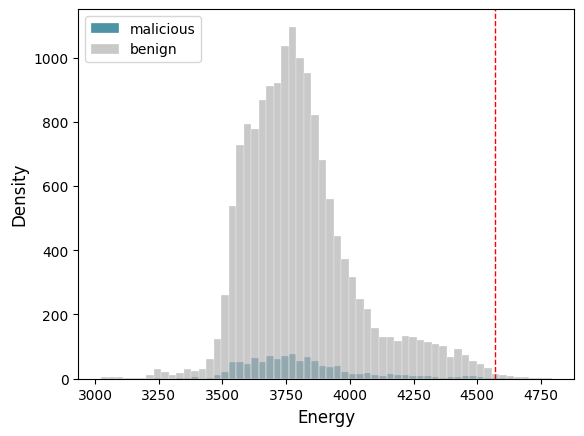

In [90]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.savefig(f'{results_efc}/3_no_unlabeled_data.png')

In [96]:
metric_dict_2 = {
    "Technique": "No Unlabeled Data",
    "accuracy": accuracy_score(y_test, y_pred[:16670]),
    "f1": None,
    "f1_micro": f1_score(y_test, y_pred[:16670], average="micro"),
    "f1_macro": f1_score(y_test, y_pred[:16670], average="macro"),
    "precision": None,
    "recall": None,
    "roc_auc": None,
}

In [97]:
df_efc_metrics.loc[2] = metric_dict_2
df_efc_metrics

/var/folders/8b/c9dvlw851kx2vf3r7gc5gbbh0000gn/T/ipykernel_99167/1469362065.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_efc_metrics.loc[2] = metric_dict_2


,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall,roc_auc
0,Unbalanced Dataset,0.842891,0.003045,0.842891,0.458886,0.002591,0.003693,0.452447
1,Unlabeled Dataset,0.260044,NaN,0.260044,0.169561,NaN,NaN,NaN
2,No Unlabeled Data,0.909238,NaN,0.909238,0.318326,NaN,NaN,NaN


In [ ]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train_1, X_test_1, y_train_1, y_test_1 = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

In [ ]:
X_test.drop(['time_step'], axis=1)
X_train.drop(['time_step'], axis=1)

In [ ]:
idx_abnormal = np.where(y_train_1 == 1)[0]  # find abnormal samples indexes in the training set
X_train_1.drop(idx_abnormal, axis=0, inplace=True)  # remove abnormal samples from training (EFC trains with only benign instances)
y_train_1.drop(idx_abnormal, axis=0, inplace=True)  # remove the corresponding abonrmal training targets

In [ ]:
X_train_1

In [ ]:
y_train_1

In [ ]:
clf = EnergyBasedFlowClassifier(n_bins=10, cutoff_quantile=0.8)

In [ ]:
clf.fit(X_train_1, y_train_1, base_class=0)

In [ ]:
y_pred_1, y_energies_1 = clf.predict(X_test_1, return_energies=True)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [ ]:
print(confusion_matrix(y_test_1, y_pred_1))
print(classification_report(y_test_1, y_pred_1))

In [ ]:
y_pred_1

### Dealing With Unbalanced Dataset

In [98]:
# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = True

In [99]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train, X_test, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [100]:
df_train = pd.concat([X_train, y_train], axis=1)

In [101]:
df_test = pd.concat([X_test, y_test], axis=1)

In [102]:
df_train

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
0,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
1,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,0
2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
3,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
4,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29889,34,-0.172968,-0.071395,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163627,-0.169442,...,1.266002,1.461330,1.461369,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
29890,34,-0.172924,-0.107411,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163583,-0.169398,...,0.534340,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
29891,34,-0.172897,-0.070152,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163555,-0.169371,...,-0.146863,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
29892,34,-0.155367,-0.081852,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.145619,-0.151686,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0


In [103]:
df_test

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
29894,35,-0.172982,-0.055242,-1.201369,-0.121970,-0.024025,-0.113002,-0.061584,-0.163642,-0.169456,...,-0.626229,0.241128,0.241406,-0.216057,-0.125939,-0.131155,-0.269818,-0.120613,-0.119792,0
29895,35,-0.166832,-0.115508,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157351,-0.163254,...,-0.575769,-0.979074,-0.978556,0.018279,-0.049041,-0.038193,-0.011377,-1.760926,-1.760984,0
29896,35,-0.167233,-0.115086,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157761,-0.163658,...,0.956938,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0
29897,35,-0.172509,-0.120473,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.163159,-0.168980,...,-0.550539,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,1
29898,35,-0.172805,-0.112290,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163461,-0.169278,...,0.004515,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46559,49,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,0
46560,49,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,0
46561,49,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
46562,49,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,-0.089510,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0


In [104]:
df_train['class'].value_counts()

class
0    26432
1     3462
Name: count, dtype: int64

In [105]:
df_test['class'].value_counts()

class
0    15587
1     1083
Name: count, dtype: int64

#### Random Under-Sampling

In [106]:
df = pd.concat([df_train, df_test])

In [107]:
df

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
0,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
1,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,0
2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
3,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
4,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46559,49,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,0
46560,49,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,0
46561,49,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
46562,49,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,-0.089510,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0


In [108]:
df = df.sample(frac=1)

In [109]:
df

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
20082,22,-0.167390,-0.154682,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157923,-0.163818,...,-0.594691,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,1
24236,26,-0.172712,-0.081127,-1.201369,0.103143,-0.043875,0.138585,-0.061584,-0.163645,-0.169189,...,-0.594691,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0
3473,3,-0.172121,-0.184668,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163643,-0.168594,...,-0.487465,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,0
36209,40,-0.162812,1.922770,1.573595,0.478330,0.353126,0.557896,-0.061584,-0.163576,-0.164028,...,0.006809,0.261779,0.321796,-0.098889,0.296999,0.460065,0.305801,-0.070461,-0.067794,0
4776,4,-0.170971,0.048298,-1.201369,-0.046932,-0.063725,-0.029140,-0.061584,-0.162871,-0.168188,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5957,4,-0.172458,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163109,-0.168931,...,-0.588384,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
26826,30,-0.166678,-0.152570,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.157194,-0.163099,...,-0.600999,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
12899,11,-0.162526,-0.158783,-1.201369,-0.121970,-0.063725,-0.113002,-0.061584,-0.152946,-0.158910,...,0.231583,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
21378,23,0.035241,-0.158783,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163565,0.040519,...,-0.588384,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0


In [110]:
df['class'].value_counts()

class
0    42019
1     4545
Name: count, dtype: int64

In [111]:
# amount of ilicit classes 4545 rows.
ilicit_df = df.loc[df['class'] == 1]
licit_df = df.loc[df['class'] == 0][:4545]

In [112]:
normal_distributed_df = pd.concat([ilicit_df, licit_df])

In [113]:
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [114]:
new_df.head()

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
27064,31,-0.172486,-0.138116,1.018602,-0.12197,-0.063725,-0.113002,-0.061584,-0.163136,-0.168958,...,-0.563154,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
25134,28,-0.170108,-0.166237,0.463609,-0.12197,-0.063725,-0.113002,-0.061584,-0.160704,-0.166559,...,0.118049,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
36701,41,-0.172642,0.160711,1.573595,-0.12197,-0.063725,-0.113002,-0.061584,-0.163288,-0.169108,...,-0.462235,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
26202,29,-0.172303,-0.135879,1.018602,-0.12197,-0.063725,-0.113002,-0.061584,-0.162949,-0.168773,...,-0.323472,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
25619,29,-0.172900,-0.131593,1.018602,-0.12197,-0.063725,-0.113002,-0.061584,-0.163560,-0.169376,...,-0.310857,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1


#### Equally Distributing and Correlating

Distribution of the Classes in the subsample dataset
class
1    0.5
0    0.5
Name: count, dtype: float64


/var/folders/8b/c9dvlw851kx2vf3r7gc5gbbh0000gn/T/ipykernel_99167/1450831521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=new_df, palette=['red', 'blue'])


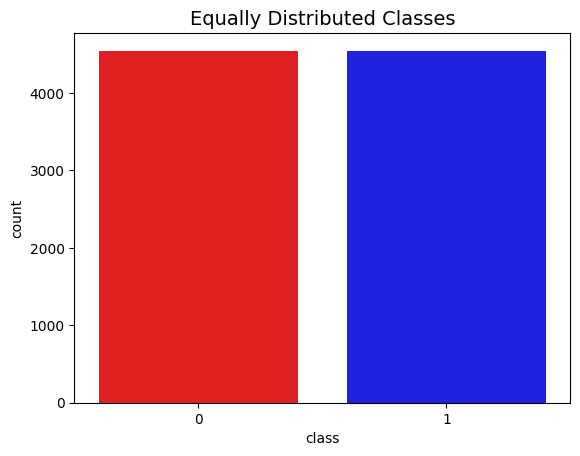

In [115]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['class'].value_counts()/len(new_df))



sns.countplot(x='class', data=new_df, palette=['red', 'blue'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### EFC With Balanced Dataset

In [116]:
new_df

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
27064,31,-0.172486,-0.138116,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163136,-0.168958,...,-0.563154,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
25134,28,-0.170108,-0.166237,0.463609,-0.121970,-0.063725,-0.113002,-0.061584,-0.160704,-0.166559,...,0.118049,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
36701,41,-0.172642,0.160711,1.573595,-0.121970,-0.063725,-0.113002,-0.061584,-0.163288,-0.169108,...,-0.462235,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
26202,29,-0.172303,-0.135879,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.162949,-0.168773,...,-0.323472,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
25619,29,-0.172900,-0.131593,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163560,-0.169376,...,-0.310857,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13299,12,-0.005206,-0.069435,1.018602,-0.121970,0.035526,-0.113002,-0.061584,0.008018,-0.000202,...,-0.596794,1.039938,1.040059,-0.098889,-0.049041,-0.066526,-0.083166,-0.388145,-0.674617,0
29085,33,0.267156,-0.094243,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,0.286684,0.274558,...,-0.582077,1.461330,1.461369,0.018279,-0.029817,0.008288,0.031697,-1.760926,-1.760984,0
7138,5,-0.172442,-0.158783,-1.201369,-0.046932,-0.024025,-0.029140,-0.061584,-0.163633,-0.168927,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.093204,-0.040092,1.299939,1.301521,0
33672,38,-0.171158,-0.058271,0.463609,-0.121970,-0.063725,-0.113002,-0.061584,-0.161775,-0.167616,...,0.294657,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1


In [117]:
X = new_df.drop(['class'], axis=1)

In [118]:
y = new_df['class']

In [119]:
X

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
27064,31,-0.172486,-0.138116,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163136,-0.168958,...,-0.577099,-0.563154,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
25134,28,-0.170108,-0.166237,0.463609,-0.121970,-0.063725,-0.113002,-0.061584,-0.160704,-0.166559,...,-0.577099,0.118049,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
36701,41,-0.172642,0.160711,1.573595,-0.121970,-0.063725,-0.113002,-0.061584,-0.163288,-0.169108,...,-0.577099,-0.462235,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
26202,29,-0.172303,-0.135879,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.162949,-0.168773,...,-0.577099,-0.323472,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
25619,29,-0.172900,-0.131593,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163560,-0.169376,...,-0.577099,-0.310857,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13299,12,-0.005206,-0.069435,1.018602,-0.121970,0.035526,-0.113002,-0.061584,0.008018,-0.000202,...,-0.542583,-0.596794,1.039938,1.040059,-0.098889,-0.049041,-0.066526,-0.083166,-0.388145,-0.674617
29085,33,0.267156,-0.094243,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,0.286684,0.274558,...,-0.539735,-0.582077,1.461330,1.461369,0.018279,-0.029817,0.008288,0.031697,-1.760926,-1.760984
7138,5,-0.172442,-0.158783,-1.201369,-0.046932,-0.024025,-0.029140,-0.061584,-0.163633,-0.168927,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.093204,-0.040092,1.299939,1.301521
33672,38,-0.171158,-0.058271,0.463609,-0.121970,-0.063725,-0.113002,-0.061584,-0.161775,-0.167616,...,-0.577099,0.294657,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792


In [120]:
y

27064    1
25134    1
36701    1
26202    1
25619    1
        ..
13299    0
29085    0
7138     0
33672    1
11945    0
Name: class, Length: 9090, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=139, stratify=y, shuffle=True, test_size=0.3
)

In [122]:
clf = EnergyBasedFlowClassifier(n_bins=10, cutoff_quantile=0.75)

In [123]:
clf.fit(X_train, y_train, base_class=0)

EnergyBasedFlowClassifier(cutoff_quantile=0.75, n_bins=10)

In [148]:
y_pred, y_energies = clf.predict(X_test, return_energies=True)

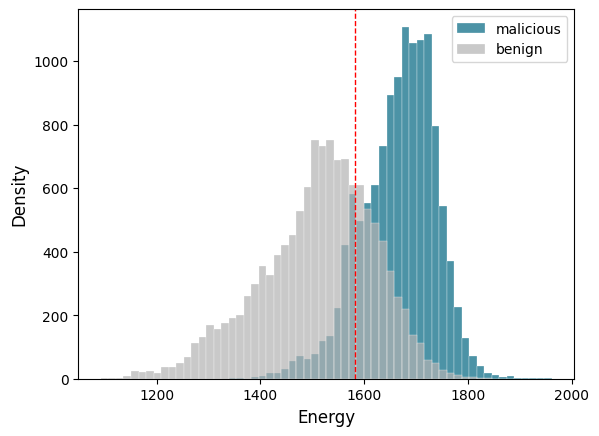

In [149]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.savefig(f'{results_efc}/4_balanced_dataset.png')

In [128]:
metric_dict_3 = {
    "Technique": "Balanced Dataset",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred, pos_label=1),
    "f1_micro": f1_score(y_test, y_pred, average="micro"),
    "f1_macro": f1_score(y_test, y_pred, average="macro"),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred),
}

In [129]:
pprint(metric_dict_3)

{'Technique': 'Balanced Dataset',
 'accuracy': 0.7675100843417675,
 'f1': np.float64(0.7876758204956463),
 'f1_macro': np.float64(0.7653938259690549),
 'f1_micro': np.float64(0.7675100843417675),
 'precision': np.float64(0.7245841035120147),
 'recall': np.float64(0.8628026412325752),
 'roc_auc': np.float64(0.7675450156309505)}


In [131]:
df_efc_metrics.loc[3] = metric_dict_3
df_efc_metrics

,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall,roc_auc
0,Unbalanced Dataset,0.842891,0.003045,0.842891,0.458886,0.002591,0.003693,0.452447
1,Unlabeled Dataset,0.260044,NaN,0.260044,0.169561,NaN,NaN,NaN
2,No Unlabeled Data,0.909238,NaN,0.909238,0.318326,NaN,NaN,NaN
3,Balanced Dataset,0.767510,0.787676,0.767510,0.765394,0.724584,0.862803,0.767545


### SMOTE Technique

In [132]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [133]:
# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = True

In [134]:
def recreate_original_df():
    X_train, X_test, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)
    df_train = pd.concat([X_train, y_train], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)
    df = pd.concat([df_train, df_test])
    X = df.drop(['class'], axis=1)
    y = df['class']

    return X, y  

In [135]:
X, y = recreate_original_df()

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [ ]:
orig_X_train, orig_X_test, orig_y_train, orig_y_test = train_test_split(X, y, test_size=0.2, random_state=139, shuffle=False)

In [ ]:
orig_X_train.iloc[1]

In [ ]:
# efc_params = {'cutoff_quantile': np.linspace(0.5, 1, 21).tolist(), 'n_bins': list(range(10, 165, 10))}

efc_params = {'cutoff_quantile': [0.7, 0.8, 0.9], 'n_bins': [10, 20, 30]}

In [ ]:
efc_smt = EnergyBasedFlowClassifier()

In [ ]:
rand_efc_smt = RandomizedSearchCV(EnergyBasedFlowClassifier(), efc_params, n_iter=4)

In [ ]:
s_kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [ ]:
for train, test in s_kfold.split(orig_X_train, orig_y_train):
    # SMOTE happens during Cross Validation not before..
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority', n_jobs=-1), rand_efc_smt, verbose=True)
    print(pipeline)
    model = pipeline.fit(orig_X_train.iloc[:10000], orig_y_train.iloc[:10000])
    print(model)
    best_est = rand_efc_smt.best_estimator_
    print(best_est)
    prediction = best_est.predict(orig_X_train.iloc[test])
    print(prediction)

    accuracy_lst.append(pipeline.score(orig_X_train.iloc[test], orig_y_train.iloc[test]))
    precision_lst.append(precision_score(orig_y_train.iloc[test], prediction))
    recall_lst.append(recall_score(orig_y_train.iloc[test], prediction))
    f1_lst.append(f1_score(orig_y_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(orig_y_train.iloc[test], prediction))
    print('end of batch')

In [ ]:
print('---' * 45, end='\n\n')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

### SMOTE Technique V2

In [136]:
X, y = recreate_original_df()

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [137]:
smote = SMOTE(sampling_strategy='minority', n_jobs=-1)

In [138]:
X_sm, y_sm = smote.fit_resample(X, y)

/Users/kevinaraujo/.pyenv/versions/masters/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [139]:
X_sm

,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,29,-0.150649,-0.107012,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.140793,-0.146927,...,-0.519856,-0.565299,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
84034,9,-0.172166,-0.158783,-1.201369,-0.121970,-0.063725,-0.113002,-0.061584,-0.162809,-0.168635,...,-0.577099,-0.222553,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
84035,20,-0.172181,-0.161532,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.162824,-0.168650,...,-0.577099,-0.053725,0.241128,0.241406,-0.062757,-0.100786,-0.131155,-0.157105,-0.120613,-0.119792
84036,39,-0.172926,0.027320,0.731814,-0.121970,-0.063725,-0.113002,-0.061584,-0.163582,-0.169398,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792


In [140]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
84033    1
84034    1
84035    1
84036    1
84037    1
Name: class, Length: 84038, dtype: int64

In [141]:
len(np.where(y_sm == 0)[0])

42019

In [142]:
len(np.where(y_sm == 1)[0])

42019

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, random_state=139, stratify=y_sm, shuffle=True, test_size=0.3
)

In [144]:
clf = EnergyBasedFlowClassifier(n_bins=10, cutoff_quantile=0.75)

In [145]:
clf.fit(X_train, y_train, base_class=0)

EnergyBasedFlowClassifier(cutoff_quantile=0.75, n_bins=10)

In [150]:
y_pred, y_energies = clf.predict(X_test, return_energies=True)

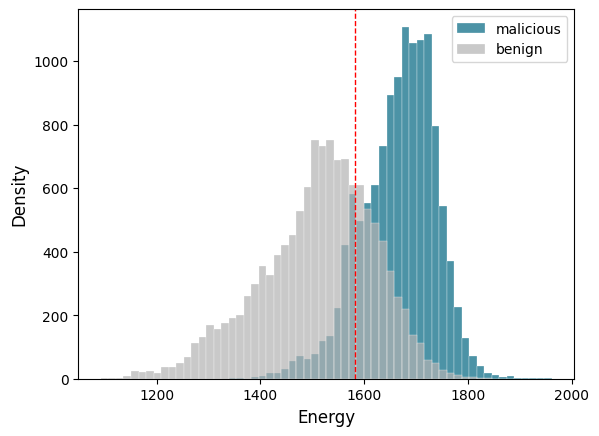

In [151]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.savefig(f'{results_efc}/5_smote.png')

In [152]:
metric_dict_4 = {
    "Technique": "Smote",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred, pos_label=1),
    "f1_micro": f1_score(y_test, y_pred, average="micro"),
    "f1_macro": f1_score(y_test, y_pred, average="macro"),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred),
}

In [153]:
pprint(metric_dict_4)

{'Technique': 'Smote',
 'accuracy': 0.7966841186736475,
 'f1': np.float64(0.8098946743806557),
 'f1_macro': np.float64(0.7956975503190575),
 'f1_micro': np.float64(0.7966841186736475),
 'precision': np.float64(0.7604819612759437),
 'recall': np.float64(0.8661748373790259),
 'roc_auc': np.float64(0.7966841186736475)}


In [154]:
df_efc_metrics.loc[4] = metric_dict_4
df_efc_metrics

,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall,roc_auc
0,Unbalanced Dataset,0.842891,0.003045,0.842891,0.458886,0.002591,0.003693,0.452447
1,Unlabeled Dataset,0.260044,NaN,0.260044,0.169561,NaN,NaN,NaN
2,No Unlabeled Data,0.909238,NaN,0.909238,0.318326,NaN,NaN,NaN
3,Balanced Dataset,0.767510,0.787676,0.767510,0.765394,0.724584,0.862803,0.767545
4,Smote,0.796684,0.809895,0.796684,0.795698,0.760482,0.866175,0.796684


### Stratified K-Fold CV

In [155]:
from sklearn.model_selection import StratifiedKFold

In [156]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

### Hyperparameter Tuning Using GridSearchCV

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
X, y = recreate_original_df()

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=139, stratify=y, test_size=0.3
)

In [161]:
efc = EnergyBasedFlowClassifier()

In [162]:
efc_params = {'cutoff_quantile': [0.7, 0.8, 0.9], 'n_bins': [10, 20, 30]}

In [163]:
grid_efc = GridSearchCV(efc, param_grid=efc_params, cv=kf, scoring='recall')

In [164]:
grid_efc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=EnergyBasedFlowClassifier(),
             param_grid={'cutoff_quantile': [0.7, 0.8, 0.9],
                         'n_bins': [10, 20, 30]},
             scoring='recall')

In [166]:
print('Best parameters:', grid_efc.best_params_)
print('Best score:', grid_efc.best_score_)

Best parameters: {'cutoff_quantile': 0.7, 'n_bins': 10}
Best score: 0.38887868645281043


In [168]:
y_pred = grid_efc.predict(X_test)

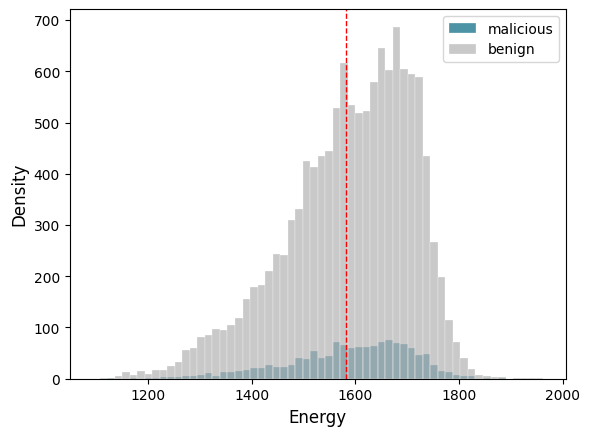

In [169]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.savefig(f'{results_efc}/6_grid_search_cv.png')

In [173]:
metric_dict_5 = {
    "Technique": "Grid Search CV",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred, pos_label=1),
    "f1_micro": f1_score(y_test, y_pred, average="micro"),
    "f1_macro": f1_score(y_test, y_pred, average="macro"),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred),
}

In [174]:
pprint(metric_dict_5)

{'Technique': 'Grid Search CV',
 'accuracy': 0.6496778811739442,
 'f1': np.float64(0.16797007820469229),
 'f1_macro': np.float64(0.4730502308695055),
 'f1_micro': np.float64(0.6496778811739442),
 'precision': np.float64(0.10934041611332448),
 'recall': np.float64(0.3621700879765396),
 'roc_auc': np.float64(0.5214785074183825)}


In [175]:
df_efc_metrics.loc[5] = metric_dict_5
df_efc_metrics

,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall,roc_auc
0,Unbalanced Dataset,0.842891,0.003045,0.842891,0.458886,0.002591,0.003693,0.452447
1,Unlabeled Dataset,0.260044,NaN,0.260044,0.169561,NaN,NaN,NaN
2,No Unlabeled Data,0.909238,NaN,0.909238,0.318326,NaN,NaN,NaN
3,Balanced Dataset,0.767510,0.787676,0.767510,0.765394,0.724584,0.862803,0.767545
4,Smote,0.796684,0.809895,0.796684,0.795698,0.760482,0.866175,0.796684
5,Grid Search CV,0.649678,0.167970,0.649678,0.473050,0.109340,0.362170,0.521479


### Random Resampling Imbalanced Datasets

#### Random Oversampling

The random oversampling may increase the likelihood of occurring overfitting, since it makes exact copies of the minority class examples. Let's say every data point from the minority class is copied 6 times before making the splits. If we did a 3-fold validation, each fold has (on average) 2 copies of each point! In this way a classifier might construct rules that are apparently accurate, but actually cover one replicated example.

In [215]:
X, y = recreate_original_df()

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [216]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=139, stratify=y, test_size=0.3
)

In [217]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=139)

In [218]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [219]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 29413 / 50.0 % of the dataset
Frauds: 29413 / 50.0 % of the dataset


##### Imbalanced-Learn Pipeline

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

During the cross-validation process we should split into training and validation segments. Then, on each segment, we should:

1.    Oversample the minority class.
2.    Train the classifier on the training segment.
3.    Validate the classifier on the remaining segment.

In [220]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [221]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=139), EnergyBasedFlowClassifier())

In [222]:
score_over = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)

print("Cross Validation Recall Scores are: {}".format(score_over))
print("Average Cross Validation Recall score: {}".format(score_over.mean()))

Cross Validation Recall Scores are: [0.12872841 0.13679245 0.1509434  0.09591195 0.10849057]
Average Cross Validation Recall score: 0.12417335584451487


#### GridSearchCV

In [184]:
## There should be two underscores between estimator name and it's parameters in a Pipeline
new_params = {'energybasedflowclassifier__' + key: efc_params[key] for key in efc_params}

In [185]:
new_params

{'energybasedflowclassifier__cutoff_quantile': [0.7, 0.8, 0.9],
 'energybasedflowclassifier__n_bins': [10, 20, 30]}

In [186]:
grid_over_efc = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

In [187]:
grid_over_efc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=139)),
                                       ('energybasedflowclassifier',
                                        EnergyBasedFlowClassifier(cutoff_quantile=0.75,
                                                                  n_bins=10))]),
             param_grid={'energybasedflowclassifier__cutoff_quantile': [0.7,
                                                                        0.8,
                                                                        0.9],
                         'energybasedflowclassifier__n_bins': [10, 20, 30]},
             return_train_score=True, scoring='recall')

In [189]:
print('Best parameters:', grid_efc.best_params_)
print('Best score:', grid_efc.best_score_)

Best parameters: {'cutoff_quantile': 0.7, 'n_bins': 10}
Best score: 0.38887868645281043


#### Confusion matrix and scores

In [196]:
y_pred, y_energies = grid_over_efc.best_estimator_.named_steps['energybasedflowclassifier'].predict(X_test, return_energies=True)

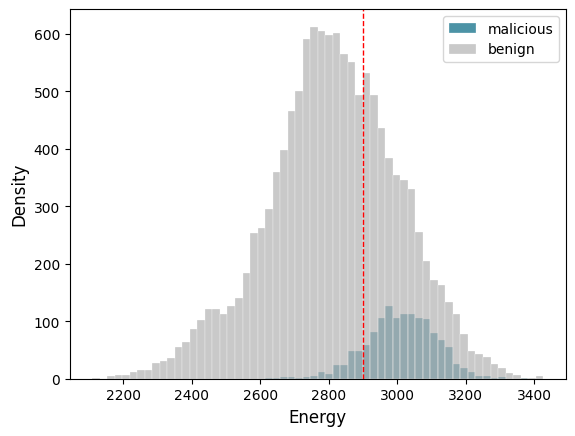

In [198]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = grid_over_efc.best_estimator_.named_steps['energybasedflowclassifier'].estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.savefig(f'{results_efc}/7_random_oversampling.png')

In [199]:
metric_dict_6 = {
    "Technique": "Random Oversampling",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred, pos_label=1),
    "f1_micro": f1_score(y_test, y_pred, average="micro"),
    "f1_macro": f1_score(y_test, y_pred, average="macro"),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred),
}

In [200]:
pprint(metric_dict_6)

{'Technique': 'Random Oversampling',
 'accuracy': 0.6886900501073729,
 'f1': np.float64(0.3517662840959905),
 'f1_macro': np.float64(0.5734621538703305),
 'f1_micro': np.float64(0.6886900501073729),
 'precision': np.float64(0.2207670720299345),
 'recall': np.float64(0.8651026392961877),
 'roc_auc': np.float64(0.7673522081139037)}


In [201]:
df_efc_metrics.loc[6] = metric_dict_6
df_efc_metrics

,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall,roc_auc
0,Unbalanced Dataset,0.842891,0.003045,0.842891,0.458886,0.002591,0.003693,0.452447
1,Unlabeled Dataset,0.260044,NaN,0.260044,0.169561,NaN,NaN,NaN
2,No Unlabeled Data,0.909238,NaN,0.909238,0.318326,NaN,NaN,NaN
3,Balanced Dataset,0.767510,0.787676,0.767510,0.765394,0.724584,0.862803,0.767545
4,Smote,0.796684,0.809895,0.796684,0.795698,0.760482,0.866175,0.796684
5,Grid Search CV,0.649678,0.167970,0.649678,0.473050,0.109340,0.362170,0.521479
6,Random Oversampling,0.688690,0.351766,0.688690,0.573462,0.220767,0.865103,0.767352


#### Random Undersampling Imbalanced Datasets

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset. This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

In [203]:
X, y = recreate_original_df()

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=139, stratify=y, test_size=0.3
)

In [205]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=139)

In [206]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [207]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 3181 / 50.0 % of the dataset
Frauds: 3181 / 50.0 % of the dataset


##### Pipeline

In [208]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [209]:
from imblearn.pipeline import Pipeline, make_pipeline

random_under_pipeline = make_pipeline(rus, EnergyBasedFlowClassifier())

In [211]:
score_under = cross_val_score(random_under_pipeline, X_under, y_under, scoring='recall', cv=kf)

print("Cross Validation Recall Scores are: {}".format(score_under))
print("Average Cross Validation Recall score: {}".format(score_under.mean()))

Cross Validation Recall Scores are: [0.85377358 0.86185243 0.84119497 0.86477987 0.85534591]
Average Cross Validation Recall score: 0.8553893545807292
